In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
inv = pd.read_csv("https://raw.githubusercontent.com/katsrte/pandas_sales_data/main/fct_invoice.csv")
cus = pd.read_json("https://raw.githubusercontent.com/katsrte/pandas_sales_data/main/dim_customer.json")

In [4]:
inv.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
cus.head()

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore


<h1>Easy</h1>

<h3>1. How many unique customers are in the dataset?</h3>

In [8]:
unique = len(inv["customer_id"].unique())
print("There are",unique,"customers in the dataset.")

There are 5191 customers in the dataset.


<h3>2. What are the different categories of products available? How many unique categories are there?</h3>

In [10]:
categories = inv["category"].unique()
count = len(categories)
print("There are",count,"categories: ",categories)

There are 8 categories:  ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


<h3>3. Which payment method is the most popular? How many times was it used?</h3>

In [12]:
methods = inv["payment_method"].value_counts().reset_index(name="Times Used")
methods

,payment_method,Times Used
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


Cash is the most popular payment method with 44447 uses.

<h1>Medium</h1>

<h3>1. What are the three most popular categories, by total sales?</h3>

In [16]:
inv['total_sales'] = inv['quantity'] * inv['price'] 
pop_cat = inv.groupby('category')['total_sales'].sum().sort_values(ascending=False).reset_index(name="total sales")
pop_cat.head(3)

,category,total sales
0,Clothing,1.139968e+08
1,Shoes,6.655345e+07
2,Technology,5.786235e+07


The 3 most popular categories according to total sales are Clothing, Shoes, and Technology.

<h3>2. What are the total sales attributed to customers over the age of 45?</h3>

In [19]:
inv.rename(columns={'customer_id':'id'},inplace=True)
joined = pd.merge(inv,cus, on='id')
joined.head()

filtered = joined[joined['age'] > 45]
print("The total sales attributed to customers over the age of 45 is",filtered['total_sales'].sum())

The total sales attributed to customers over the age of 45 is 82039768.15


<h3>3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)</h3>

In [21]:
inv['invoice_date'] = pd.to_datetime(inv['invoice_date'], format='%d/%m/%Y')
invoice_count = inv.groupby('invoice_date')['invoice_date'].count().reset_index(name='invoice_count')
sorted = invoice_count.sort_values(by='invoice_date')

sorted.head()

,invoice_date,invoice_count
0,2021-01-01,105
1,2021-01-02,134
2,2021-01-03,137
3,2021-01-04,119
4,2021-01-05,120


In [22]:
sorted['year_month'] = sorted['invoice_date'].dt.to_period('M')  # Create a new column for the year and month
monthly = sorted.groupby(sorted['invoice_date'].dt.to_period('M'))['invoice_count'].sum().reset_index(name='monthly_count')  # Group by year and month and sum the invoice_count
monthly.head()

,invoice_date,monthly_count
0,2021-01,3835
1,2021-02,3407
2,2021-03,3813
3,2021-04,3724
4,2021-05,3848


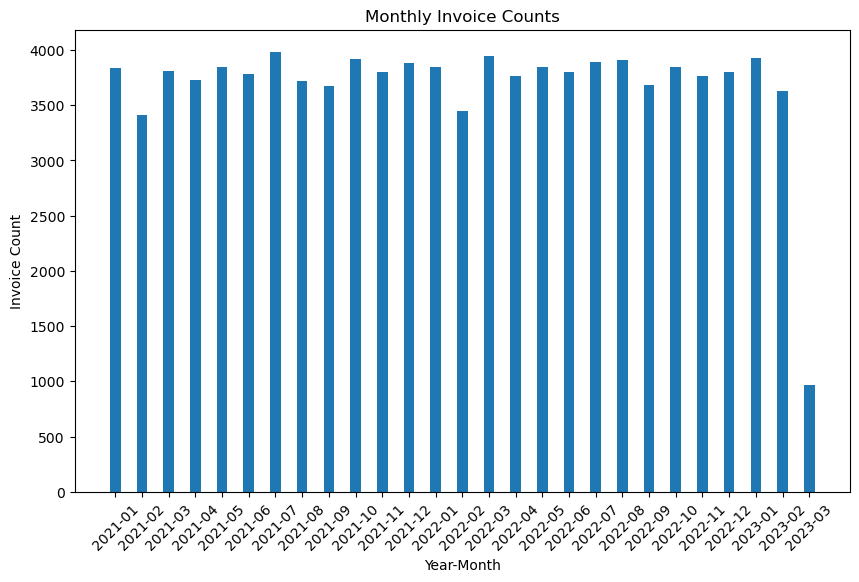

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(monthly['invoice_date'])), monthly['monthly_count'], width=0.4)
plt.xlabel('Year-Month')
plt.ylabel('Invoice Count')
plt.title('Monthly Invoice Counts')
plt.xticks(range(len(monthly['invoice_date'])), monthly['invoice_date'],rotation=45)  # Set x-axis labels
plt.show()

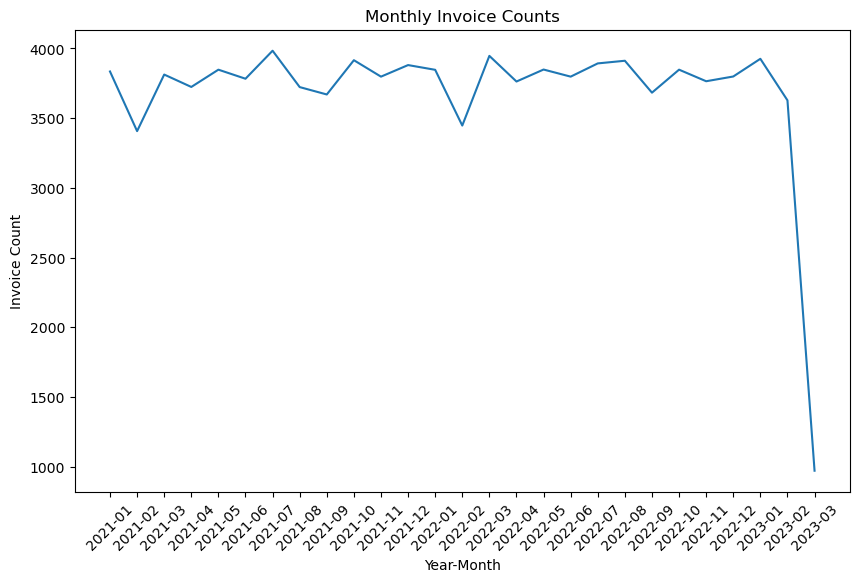

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(monthly['invoice_date'])), monthly['monthly_count'])
plt.xlabel('Year-Month')
plt.ylabel('Invoice Count')
plt.title('Monthly Invoice Counts')
plt.xticks(range(len(monthly['invoice_date'])), monthly['invoice_date'],rotation=45)  # Set x-axis labels
plt.show()

There is no observable major trend or pattern.

<h1>Hard</h1>

<h3>1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).</h3>

In [27]:
inv['total_sales'] = inv['quantity'] * inv['price'] 
inv.rename(columns={'customer_id':'id'},inplace=True)
joined = pd.merge(inv,cus, on='id')

joined['age_groups'] = pd.cut(joined.age, [10,19,29,39,49,59,69,79,89,99])

joined.pivot_table(index='category',columns=['age_groups'],values='total_sales',aggfunc='sum',observed=False)

age_groups,"(10, 19]","(19, 29]","(29, 39]","(39, 49]","(49, 59]","(59, 69]","(69, 79]","(79, 89]","(89, 99]"
category,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,0.0
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,0.0
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,0.0
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,0.0
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,0.0
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,0.0
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,0.0
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,0.0
